In [2]:
zip_path = '/content/drive/My\ Drive/Datasets/cats-dogs.zip'

!cp {zip_path} /content/

!cd /content/

!unzip -q /content/cats-dogs.zip -d /content

# !rm /content/cats-dogs.zip

In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [4]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
# model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

opt = SGD(lr=0.001, momentum=0.9)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 320000)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               40960128  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 40,961,153
Trainable params: 40,961,153
Non-trainable params: 0
_________________________________________________________________


In [5]:
dataset_dir = '/content/'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1.0/255.0)

train_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 12749 images belonging to 2 classes.
Found 2252 images belonging to 2 classes.


In [6]:
history_base_model = model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=75)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/75
100/100 [==============================] - 44s 437ms/step - loss: 0.7169 - accuracy: 0.5342 - val_loss: 0.6764 - val_accuracy: 0.5719
Epoch 2/75
100/100 [==============================] - 44s 436ms/step - loss: 0.6740 - accuracy: 0.5773 - val_loss: 0.6784 - val_accuracy: 0.5573
Epoch 3/75
100/100 [==============================] - 43s 431ms/step - loss: 0.6604 - accuracy: 0.6050 - val_loss: 0.6718 - val_accuracy: 0.5755
Epoch 4/75
100/100 [==============================] - 43s 428ms/step - loss: 0.6478 - accuracy: 0.6192 - val_loss: 0.6824 - val_accuracy: 0.5750
Epoch 5/75
100/100 [==============================] - 42s 422ms/step - loss: 0.6476 - accuracy: 0.6151 - val_loss: 0.6433 - val_accuracy: 0.6297
Epoch 6/75
100/100 [==============================] - 42s 424ms/step - loss: 0.6435 - accuracy: 0.6194 - val_loss: 0.6776 - val_accuracy: 0.5733
Epoch 7/75
100/100 [==============================] - 

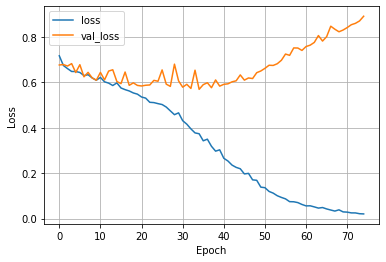

In [7]:
plot_loss(history_base_model)